In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [3]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris, sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
X = df.iloc[:, 0:4].values
y = df["class"].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression score:  0.8


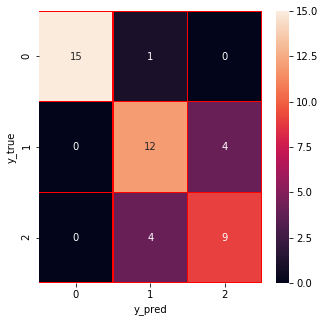

In [6]:
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

lr_cm = confusion_matrix(y_test, logreg_pred)
print("Logistic Regression score: ", logreg.score(X_test, y_test))

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(lr_cm, annot=True, linewidth = .5, linecolor = 'red', fmt = ".0f", ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

KNN accuracy score:  0.9333333333333333


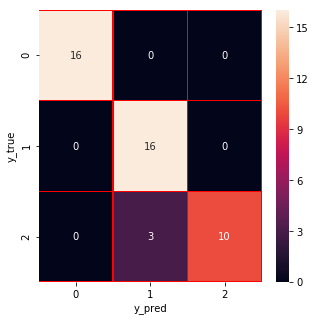

In [7]:
knn = KNeighborsClassifier(n_neighbors = 10, metric='minkowski')
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
print("KNN accuracy score: ", knn.score(X_test, y_test))

knn_cm = confusion_matrix(y_test, knn_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(knn_cm, annot=True, linewidths = .5, linecolor = 'red', fmt = '.0f', ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

SVC accuracy:  0.8444444444444444


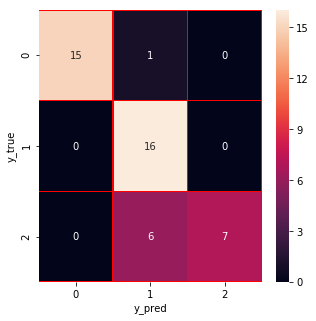

In [8]:
svc = SVC(kernel = 'poly')
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)
print("SVC accuracy: ", svc.score(X_test, y_test))

svc_cm = confusion_matrix(y_test, svc_pred)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(svc_cm, annot=True, linewidth = .5, linecolor = 'red', fmt = '.0f', ax=ax)

plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Gaussian Naive Bayes accuracy:  0.8888888888888888


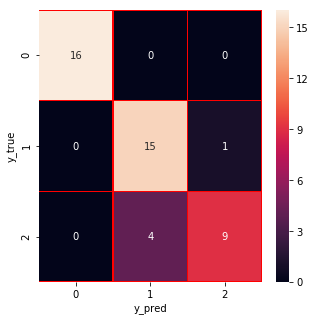

In [9]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_pred = gnb.predict(X_test)
print("Gaussian Naive Bayes accuracy: ", gnb.score(X_test, y_test))

gnb_cm = confusion_matrix(y_test, gnb_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(gnb_cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Decision Tree accuracy:  0.8888888888888888


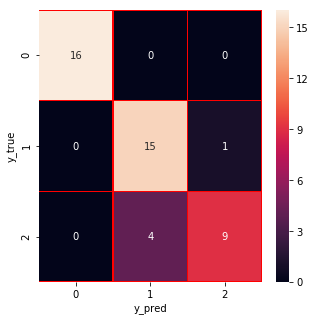

In [15]:
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)
print("Decision Tree accuracy: ", dtc.score(X_test, y_test))

dtc_cm = confusion_matrix(y_test, dtc_pred)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(dtc_cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Random Forest accuracy:  0.8888888888888888


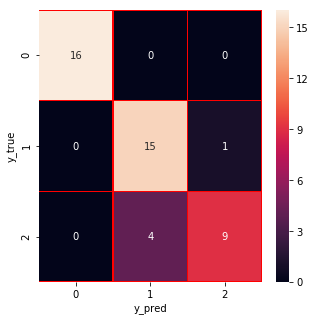

In [16]:
rfc = RandomForestClassifier(n_estimators = 10, criterion='entropy')
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print("Random Forest accuracy: ", rfc.score(X_test, y_test))

rfc_cm = confusion_matrix(y_test, rfc_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(rfc_cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### ROC Curve 

In [60]:
y_proba = rfc.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 0], pos_label = 'e')
print(fpr, tpr)

[0.         0.35555556 0.44444444 1.        ] [nan nan nan nan]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
